In [3]:
#Necessary imports
from astropy.io import fits #used to open fits files in which data are stored
import pylab #plotting
import glob
import numpy as np 
import pandas as pd
import scipy.signal
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from scipy.signal import medfilt
from scipy.signal import lombscargle
import scipy.optimize
from scipy import interpolate
from scipy.optimize import curve_fit
#add here the source number assigned to you, '1' or '2'
#Dagon & Dimidium are '1'
#Osiris & Proxima b are '2'
mykepler = '2' 

In [281]:
def import_and_flatten_lightcurve():
    alldata = pd.DataFrame()
    #looping through each dataset - normalises the flux and the error in the flux 
    for lcfile in glob.glob('Data/Object%slc/kplr*.fits' %(mykepler)):
        tmp = fits.open(lcfile)
        tmptime = (tmp[1].data['TIME'])
        tmpflux = (tmp[1].data['PDCSAP_FLUX'])
        normalflux = tmpflux/np.nanmedian(tmp[1].data['PDCSAP_FLUX'])
        tmperror = (tmp[1].data['PDCSAP_FLUX_ERR'])/np.nanmedian(tmp[1].data['PDCSAP_FLUX'])
    
        #combining all the separate datasets into one dataframe 
        df = pd.DataFrame({
            'time': tmptime,
            'flux': normalflux,
            'error':tmperror
             })
        alldata = alldata.append(df) 

    #sort values in chronological order 
    alldata.sort_values(by='time', inplace=True)
    
    #remove any nan values from the dataset
    alldata.dropna(inplace=True)

    #removes any visible outliers 
    alldata = alldata[alldata['flux']<1.001]

    #calculates the median filter
    median = medfilt(alldata['flux'], kernel_size=101) ##kernel_size is the size of the window over which the median is calculated 
    #flattened data is the lightcurve divided by the median flux filter 
    #clean_flux = alldata['flux']/median
    
    alldata['clean flux'] = alldata['flux']/median
    #print the first 5 lines of the dataframe to check it looks reasonable
    return alldata
    #plot the flattened lightcurve 

In [129]:
import_and_flatten_lightcurve()

,time,flux,error,clean flux
0,131.512045,1.000088,0.000141,1.000687
1,131.532480,1.000061,0.000141,1.000557
2,131.552914,0.999893,0.000141,1.000229
3,131.573349,0.999667,0.000141,1.000000
4,131.593783,0.999685,0.000141,1.000004
...,...,...,...,...
1551,1590.919245,1.000010,0.000145,1.000218
1552,1590.939680,0.999941,0.000145,1.000151
1553,1590.960114,1.000234,0.000145,1.000494
1554,1590.980549,0.998774,0.000144,0.999145


         time      flux     error
0  131.512045  1.000088  0.000141
1  131.532480  1.000061  0.000141
2  131.552914  0.999893  0.000141
3  131.573349  0.999667  0.000141
4  131.593783  0.999685  0.000141


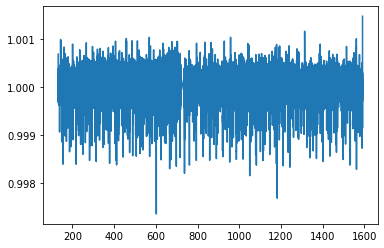

In [282]:
alldata = pd.DataFrame()

#looping through each dataset - normalises the flux and the error in the flux 
for lcfile in glob.glob('Data/Object%slc/kplr*.fits' %(mykepler)):
    tmp = fits.open(lcfile)
    tmptime = (tmp[1].data['TIME'])
    tmpflux = (tmp[1].data['PDCSAP_FLUX'])
    normalflux = tmpflux/np.nanmedian(tmp[1].data['PDCSAP_FLUX'])
    tmperror = (tmp[1].data['PDCSAP_FLUX_ERR'])/np.nanmedian(tmp[1].data['PDCSAP_FLUX'])
    
    #combining all the separate datasets into one dataframe 
    df = pd.DataFrame({
        'time': tmptime,
        'flux': normalflux,
        'error':tmperror
         })
    alldata = alldata.append(df) 

#sort values in chronological order 
alldata.sort_values(by='time', inplace=True)

#remove any nan values from the dataset
alldata.dropna(inplace=True)

#removes any visible outliers 
alldata = alldata[alldata['flux']<1.001]

#calculates the median filter
median = medfilt(alldata['flux'], kernel_size=101) ##kernel_size is the size of the window over which the median is calculated 
#flattened data is the lightcurve divided by the median flux filter 
flattened_lightcurve = alldata['flux']/median

#print the first 5 lines of the dataframe to check it looks reasonable
print(alldata.head())

#plot
pylab.plot(alldata['time'], flattened_lightcurve)

In [6]:
import_and_flatten_lightcurve()

,time,flux,error,clean flux
0,131.512045,1.000088,0.000141,1.000687
1,131.532480,1.000061,0.000141,1.000557
2,131.552914,0.999893,0.000141,1.000229
3,131.573349,0.999667,0.000141,1.000000
4,131.593783,0.999685,0.000141,1.000004
...,...,...,...,...
1551,1590.919245,1.000010,0.000145,1.000218
1552,1590.939680,0.999941,0.000145,1.000151
1553,1590.960114,1.000234,0.000145,1.000494
1554,1590.980549,0.998774,0.000144,0.999145


In [7]:
alldata.sort_values(by='time', inplace=True)

In [283]:
alldata.head()

,time,flux,error
0,131.512045,1.000088,0.000141
1,131.532480,1.000061,0.000141
2,131.552914,0.999893,0.000141
3,131.573349,0.999667,0.000141
4,131.593783,0.999685,0.000141


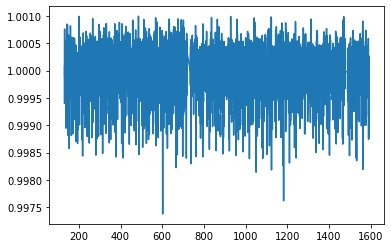

In [9]:
#removes any nan values 
alldata.dropna(inplace=True)
#removes outliers 
alldata = alldata[alldata['flux']<1.001]
pylab.plot(alldata['time'], alldata['flux'])

In [10]:
def flatten_lightcurve(time_data, flux_data, error_data):
    #calculate the median filter 
    median = medfilt(flux_data, kernel_size=101) ##kernel_size is the size of the window over which the median is calculated 
    flattened_lightcurve = flux_data/median

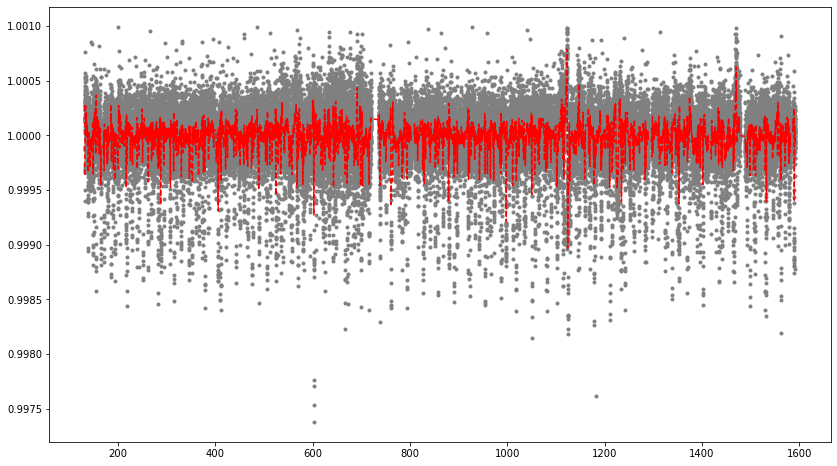

In [11]:
#Savitzky-Golay filter
interp_savgol = savgol_filter(alldata['flux'], window_length=101, polyorder=4)

pylab.figure(figsize=(14,8))
#pylab.xlim(600,800)
pylab.plot(alldata['time'], alldata['flux'], ls='None', marker='.', c='grey', label='Data')
pylab.plot(alldata['time'], interp_savgol, ls='--', c='r', label='Savitzky Golay w=11,o=3')

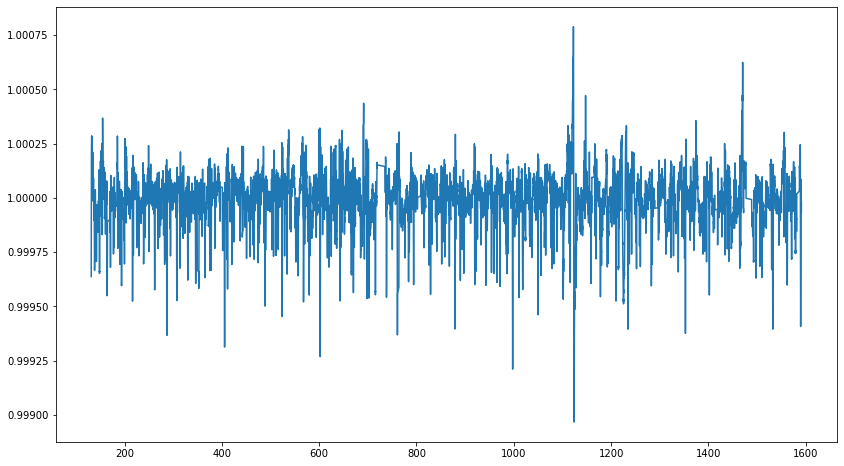

In [12]:
#SAV-GOL FILTER
pylab.figure(figsize=(14,8))
pylab.plot(alldata['time'], interp_savgol)

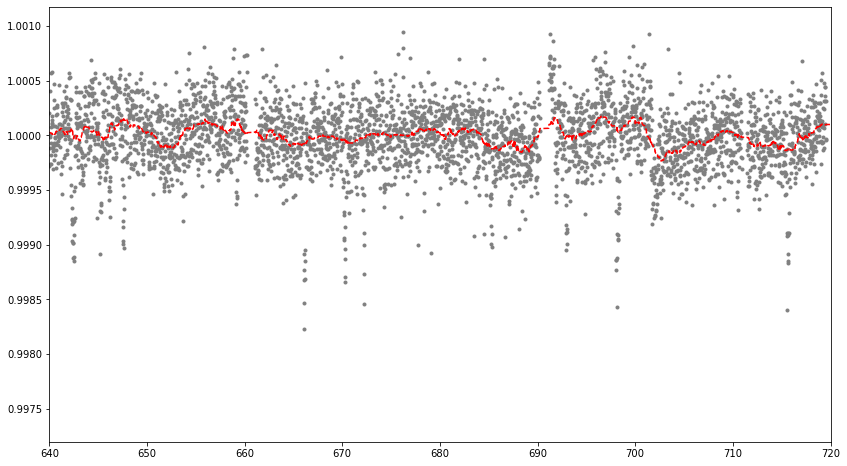

In [13]:
#median filter 
median = medfilt(alldata['flux'], kernel_size=101) ##kernel_size is the size of the window over which the median is calculated 

pylab.figure(figsize=(14,8))
pylab.xlim(640,720)
pylab.plot(alldata['time'], alldata['flux'], ls='None', marker='.', c='grey', label='Data')
pylab.plot(alldata['time'], median, ls='--', c='r', label='Median Filter')

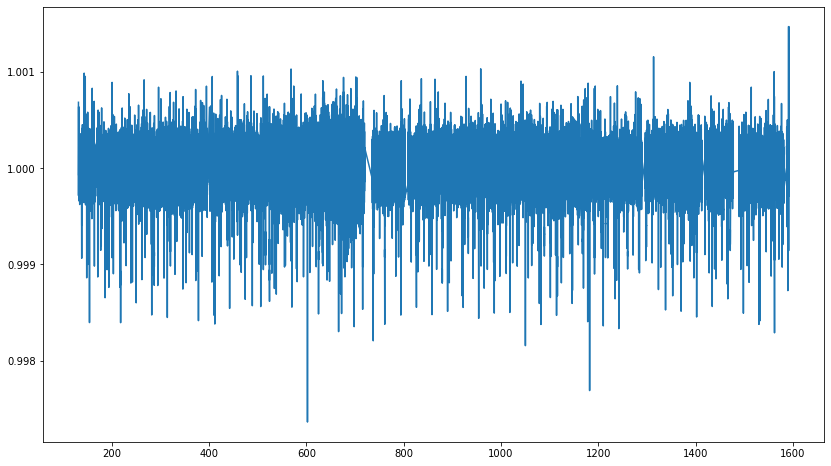

In [14]:
#MEDIAN FILTER
median_filter = alldata['flux']/median
pylab.figure(figsize=(14,8))
pylab.plot(alldata['time'], median_filter)

In [15]:
freqs = np.linspace(1/670., (1/0.02043), 100000)

In [20]:
alldata['time'][0]

131.5120452097326

In [32]:
lomb = scipy.signal.lombscargle(alldata['time'], median_filter, freqs, precenter = True)

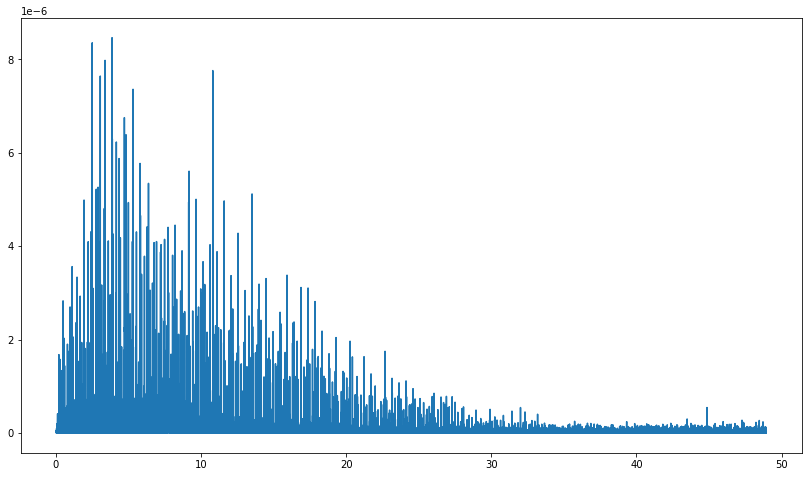

In [33]:
pylab.figure(figsize=(14,8))
pylab.plot(freqs,lomb)
#plt.xlabel('Frequency (Days^-1)')
#plt.ylabel('Lomb-Scargle Periodogram')
#plt.title('Lomb-Scargle Periodgram to detect exoplanet periods')

In [34]:
#applying lombscargle again 

In [35]:
freqs[1]-freqs[0]

0.0004894662296905329

In [36]:
freqs[-1]-freqs[0]

48.94613350282362

In [37]:
freqs2 = np.linspace(1/48.9461, (1/0.004895), 20000)

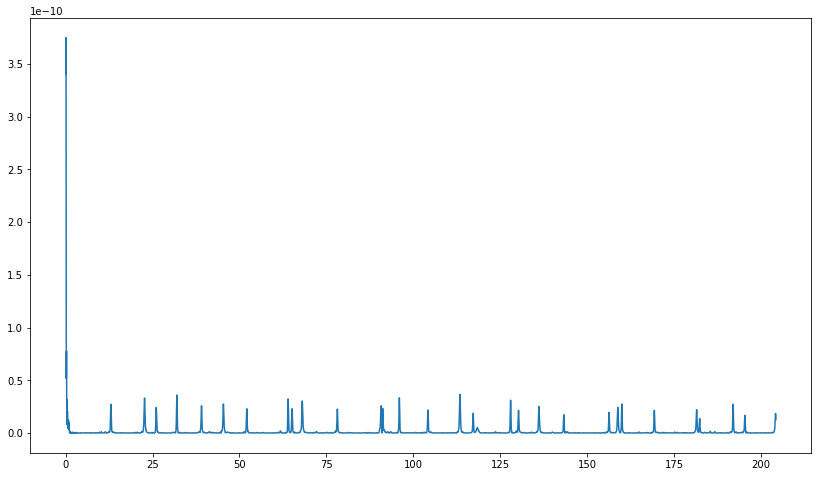

In [38]:
lomb2 = scipy.signal.lombscargle(freqs, lomb, freqs2, precenter = True)

pylab.figure(figsize=(14,8))
pylab.plot(freqs2,lomb2)

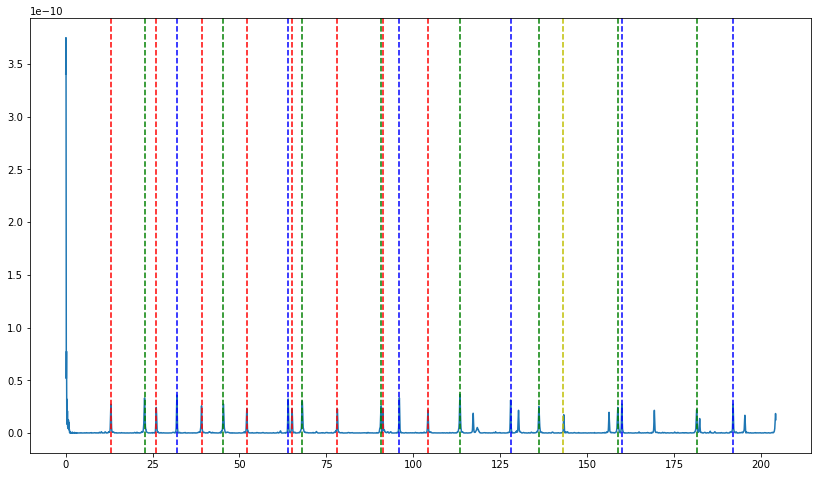

In [39]:
pylab.figure(figsize=(14,8))
pylab.plot(freqs2,lomb2)
#pylab.xlim(0,200)
guess_freq = 13.03
pylab.axvline(guess_freq, c='r', ls='--')
for i in [2,3,4,5,6,7,8]:
    pylab.axvline(guess_freq*i, c='r', ls='--' )
    
guess_freq2 = 22.6845
pylab.axvline(guess_freq2, c='g', ls='--')
for i in [2,3,4,5,6,7,8]:
    pylab.axvline(guess_freq2*i, c='g', ls='--' )

guess_freq3 = 32
pylab.axvline(guess_freq3, c='b', ls='--')
for i in [2,3,4,5,6]:
    pylab.axvline(guess_freq3*i, c='b', ls='--' )
    
guess_freq4 = 143
pylab.axvline(guess_freq4, c='y', ls='--')
#for i in [1.5]:
#    pylab.axvline(guess_freq4*i, c='y', ls='--' )

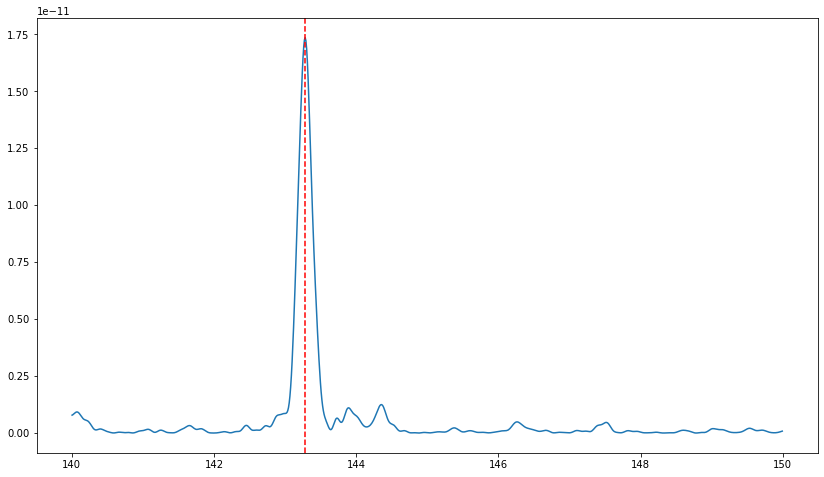

In [40]:
pylab.figure(figsize=(14,8))
mask = (freqs2>140)
mask1 = (freqs2<150)
mask2 = mask & mask1
#freqs2[mask]
#lomb2[mask]
masked_freqs2 = freqs2[mask2]
masked_lomb2 = lomb2[mask2]
pylab.plot(masked_freqs2,masked_lomb2)
guess_freq = 143.28190718
pylab.axvline(guess_freq, c='r', ls='--')

In [41]:
index_max = pd.DataFrame(masked_lomb2).idxmax()
masked_freqs2[index_max]

array([143.28190718])

In [42]:
#pylab.figure(figsize=(14,8))
#pylab.plot(freqs,lomb)
#pylab.xlim(0,5)
#guess_freq = 1.108
#pylab.axvline(guess_freq, c='r', ls='--')
#for i in [1.5, 2, 2.5, 3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5,11,11.5]:
#    pylab.axvline(guess_freq*i, c='g', ls='--' )

In [284]:
alldata

,time,flux,error
0,131.512045,1.000088,0.000141
1,131.532480,1.000061,0.000141
2,131.552914,0.999893,0.000141
3,131.573349,0.999667,0.000141
4,131.593783,0.999685,0.000141
...,...,...,...
1551,1590.919245,1.000010,0.000145
1552,1590.939680,0.999941,0.000145
1553,1590.960114,1.000234,0.000145
1554,1590.980549,0.998774,0.000144


In [285]:
time = np.array(alldata['time'])
flux = np.array(alldata['flux'])
error = np.array(alldata['error'])

In [286]:
np.savetxt('test_fold2.csv', np.array([time, flux, error]).transpose(), header='#JD, mag, error', delimiter=',')

In [296]:
#folding the lightcurve 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


def fold_lightcurve(filename, period, xlim0, xlim1,*args, **kwargs):
    obj_name = kwargs.get('obj_name', None)
    outdata = kwargs.get('output_file', 'folded_lc_data.csv')
    plotname = kwargs.get('plot_file', 'folded_lc.pdf')
    
    ## Read in the data. Should be comma separated, header row (if present) should have # at the start.
    data = pd.read_csv(filename, usecols=[0,1,2], names=('JD', 'mag', 'error'), comment='#')
    if len(data.columns) < 3:
        print("File format should be \n\
              (M)JD, magnitude, uncertainty\n")
        exit(1)
    ## Folding the lightcurve:
    ## Phase = JD/period - floor(JD/period)
    ## The floor function is there to make sure that the phase is between 0 and 1.
    
    data['Phase'] = data.apply(lambda x: ((x.JD/ period) - np.floor(x.JD / period)), axis=1)
    
      
    ## Now make the plot
    
    plt.clf()
    plt.figure(figsize=(10,5))
    
    ## concatenating the arrays to make phase -> 0 - 3
    ## This makes it easier to see if periodic lightcurves join up as expected
    
    #phase_long = np.concatenate((data.Phase, data.Phase + 1.0, data.Phase + 2.0))
    phase_long = np.concatenate((data.Phase, data.Phase, data.Phase))
    mag_long = np.concatenate((data.mag, data.mag, data.mag))
    err_long = np.concatenate((data.error, data.error, data.error))
    
    #plt.errorbar(phase_long, mag_long, yerr=err_long, marker='o', ls='None', zorder=4, label='_nolegend_', mec='Grey', ms=0.5)
    plt.plot(phase_long, mag_long,ls='None', marker='o',ms=0.7)
    ## Inverting the y axis because magnitudes
    #plt.gca().invert_yaxis()
    
    plt.xlabel('Phase ($\phi$)')
    plt.ylabel('Magnitude')
    plt.xlim(xlim0,xlim1)
    
    ## making the plot title to include object and period. 
    ## If no object name given in kwargs then title is just period
    if obj_name != None:
        namestring = str(obj_name) + ', '
    else:
        namestring = ''
    titletext = namestring + 'P = ' + str(np.around(period, decimals=4)) + 'd'
    plt.suptitle(titletext)
    
    plt.savefig(plotname)
    
    ## Printing the phased data to a csv file.
    ## If filename not given in fold_lightcurve arguments default filename is folded_lc_data.csv
    data.sort_values(by='Phase', inplace=True)
    data.to_csv(outdata, header=True, index=False, sep=',')

    
    return data

<Figure size 432x288 with 0 Axes>

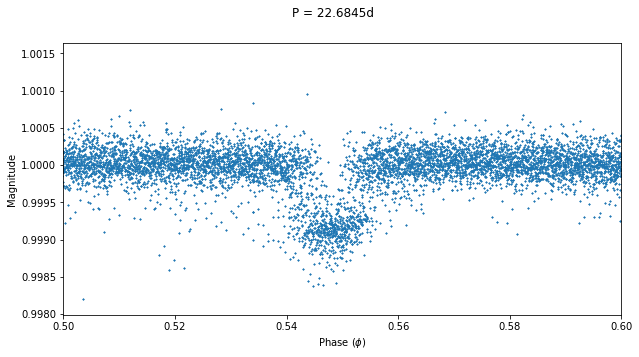

In [288]:
plt.xlim(0.5, 0.6)
tmp=fold_lightcurve('test_fold.csv', 22.6845, 0.5, 0.6)

<Figure size 432x288 with 0 Axes>

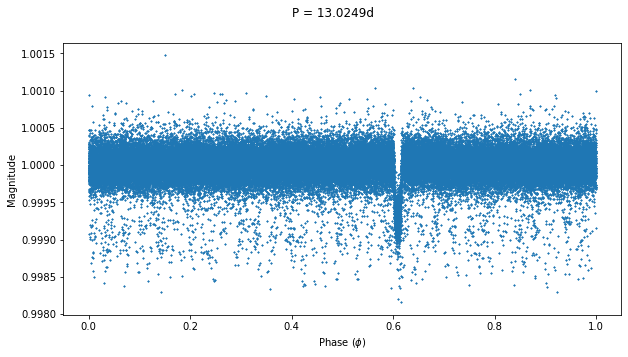

In [73]:
tmp=fold_lightcurve('test_fold.csv', 13.0249)

In [297]:
data

,JD,mag,error,Phase
0,131.512045,1.000687,0.000141,0.096972
1,131.532480,1.000557,0.000141,0.098540
2,131.552914,1.000229,0.000141,0.100109
3,131.573349,1.000000,0.000141,0.101678
4,131.593783,1.000004,0.000141,0.103247
...,...,...,...,...
64714,1590.919245,1.000218,0.000145,0.144450
64715,1590.939680,1.000151,0.000145,0.146019
64716,1590.960114,1.000494,0.000145,0.147588
64717,1590.980549,0.999145,0.000144,0.149157


<Figure size 432x288 with 0 Axes>

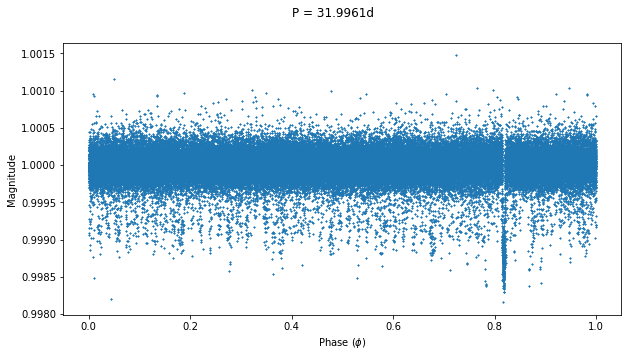

In [114]:
tmp=fold_lightcurve('test_fold.csv', 31.9961)

In [208]:
period = 13.0249
data = pd.read_csv('test_fold.csv', usecols=[0,1,2], names=('JD', 'mag', 'error'), comment='#')
data['Phase'] = data.apply(lambda x: ((x.JD/ period) - np.floor(x.JD / period)), axis=1)
phase_long = np.concatenate((data.Phase, data.Phase, data.Phase))
mag_long = np.concatenate((data.mag, data.mag, data.mag))
err_long = np.concatenate((data.error, data.error, data.error))

In [266]:
data

,JD,mag,error,Phase
0,131.512045,1.000687,0.000141,0.096972
1,131.532480,1.000557,0.000141,0.098540
2,131.552914,1.000229,0.000141,0.100109
3,131.573349,1.000000,0.000141,0.101678
4,131.593783,1.000004,0.000141,0.103247
...,...,...,...,...
64714,1590.919245,1.000218,0.000145,0.144450
64715,1590.939680,1.000151,0.000145,0.146019
64716,1590.960114,1.000494,0.000145,0.147588
64717,1590.980549,0.999145,0.000144,0.149157


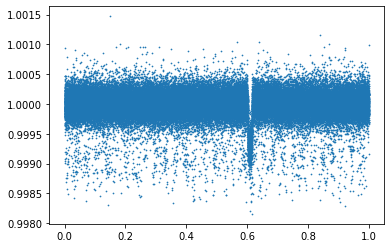

In [269]:
pylab.plot(data['Phase'],data['mag'], ls='None', marker='o', ms=0.7)

In [216]:
#MASK DATA TO ONE TRANSIT 
xmask = (phase_long > 0.59) & (phase_long < 0.625)
x = phase_long[xmask]
y = mag_long[xmask]
err = err_long[xmask]
 
sort_df = pd.DataFrame({'x':x, 'y':y, 'err':err})
sort_df.sort_values(by='x', inplace=True)
x_sorted = np.array(sort_df['x'])
y_sorted = np.array(sort_df['y'])
err_sorted = np.array(sort_df['err'])

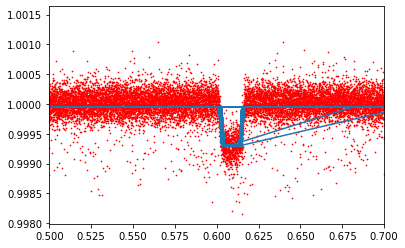

In [298]:
plt.xlim(0.5, 0.7)
pylab.plot(data['Phase'], data['mag'], c='r', marker='o',ls='None', ms=0.7)
model_y = lightcurve_model(data['Phase'], popt[0], popt[1])
pylab.plot(data['Phase'], model_y)

In [218]:
def lightcurve_model(t, base_flux, transit_flux):
    model=np.ones(len(t))
    t_start = 0.603
    t_end = 0.615
    for i in range(0,len(t)):
        if (t[i] > t_start) and (t[i] < t_end):
            model[i] = transit_flux
        else: 
            model[i] = base_flux
    return model 

In [219]:
popt, pcov = curve_fit(lightcurve_model, x_sorted, y_sorted, sigma=err_sorted, p0=[1, 0.999])

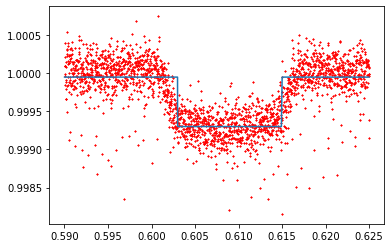

In [220]:
pylab.plot(x_sorted, y_sorted, c='r', marker='o',ls='None', ms=0.7)
model_y = lightcurve_model(x_sorted, popt[0], popt[1])
pylab.plot(x_sorted, model_y)

In [299]:
popt

array([0.99994798, 0.99930029])

In [222]:
popt[1]

0.9993002876592689

In [223]:
pcov

array([[ 1.51196003e-11, -0.00000000e+00],
       [ 0.00000000e+00,  2.91692248e-11]])

In [139]:
#uncertainty in measurement 
unc = np.sqrt(np.diag(pcov))

In [147]:
unc[1]

1.407092810854527e-05

In [228]:
def planet_radius(popt, pcov):
    'given the outputs of the curve fit function (popt and pcov), which returns the optimised base flux'
    'and transit flux values and their repective uncertainties, the radius of the planet is determined, using the formula'
    'change in flux/flux = planet radius/stellar radius'
    star_radius = stellar_info['radius'][0]
    star_radius_unc = stellar_info['radius err'][0]
    
    flux_base = popt[0]
    flux_transit = popt[1]
    
    uncertainty = np.sqrt(np.diag(pcov))
    
    flux_base_unc = uncertainty[0]
    flux_transit_unc = uncertainty[1]
    
    planet_radius = np.sqrt((star_radius**2) * ((flux_base-flux_transit)/flux_base))  #in solar radii
    
    #assume uncertainty in flux_transit >> flux_base  (units solar radii)
    planet_radius_unc = planet_radius * (np.sqrt((flux_transit_unc / flux_transit)**2 + (star_radius_unc / star_radius)**2))

    print("Radius of planet is %.4e +/- %.4e" % (planet_radius,planet_radius_unc))

In [227]:
planet_radius(popt, pcov)

Radius of planet is 2.7105e-02 +/- 5.0901e-04


In [108]:
mass_p = [0.023, 0.009, 0.025] #planet mass (Jupiter mass)
mass_p_err = [0.004, 0.005, 0.006]  #planet mass error 
period_p = [22.6845, 13.0249, 31.9961]  #planet period in days 
planet_info = pd.DataFrame({'period':period_p, 'mass': mass_p, 'mass err':mass_p_err})

#stellar properties in comparison to sun (solar radii and solar mass units)
stellar_info = pd.DataFrame({'radius':1.065, 'radius err':0.02, 'mass':0.961, 'mass err':0.025}, index=[0])

In [109]:
planet_info

,period,mass,mass err
0,22.6845,0.023,0.004
1,13.0249,0.009,0.005
2,31.9961,0.025,0.006


In [110]:
stellar_info

,radius,radius err,mass,mass err
0,1.065,0.02,0.961,0.025


In [229]:
radius_p = [2.9701e-02,2.7105e-02,3.7212e-02]
radius_p_err = [5.5777e-04,5.0901e-04,6.9881e-04]

In [230]:
planet_info['radius'] = radius_p
planet_info['radius err'] = radius_p_err

In [231]:
planet_info.head()

,period,mass,mass err,radius,radius err
0,22.6845,0.023,0.004,0.029701,0.000558
1,13.0249,0.009,0.005,0.027105,0.000509
2,31.9961,0.025,0.006,0.037212,0.000699


In [247]:
def semi_major_axis(period):
    "calculate semi major axis of planet (a) using Kepler's third law, given the period in DAYS"
    period_secs = period * 24 * 3600
    G = 6.67e-11
    solar_mass = 1.989e30
    #assume mass of star >> mass of planet 
    mass = 0.961 *solar_mass
    AU = 1.496e11
    
    a = ((period_secs**2) * G * mass * (1/4*np.pi))**(1/3)
    return a/AU

In [248]:
semi_major_axis(22.6845)

0.4861328893542407

In [250]:
planet_info['semi_major'] = semi_major_axis(planet_info['period'])

In [251]:
planet_info

,period,mass,mass err,radius,radius err,semi_major
0,22.6845,0.023,0.004,0.029701,0.000558,0.486133
1,13.0249,0.009,0.005,0.027105,0.000509,0.335829
2,31.9961,0.025,0.006,0.037212,0.000699,0.611411


In [ ]:
def planet_temperature():
    